# Business Understanding


In this project I have used the dataset from Stack Overflow survey data 2017.
www.https://www.kaggle.com/stackoverflow/so-survey-2017/data

The goal of this project is to find out:

* What’s the overall salary looks like?
* Which location pays the maximum salary for professional developers?
* comparison between the salary in the GCC countries (Arab Gulf countries) with the rest of the other locations

# Data Understanding

In [4]:
#Importar librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#read the data
df = pd.read_csv('survey_results_public2017.csv')

#display the data
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [7]:
df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In this data, we have 154 different columns. Many of the columns contains Null Data.

#### We will focus  the project on salaries, and we have in the salary column 38501 null values, so we will resort to dropping these values :

In [8]:
df = df.dropna(axis=0, subset=['Salary'])

After running the above code, all the salary with NA values will be dropped from the dataset.

* #  What’s the overall salary looks like?

 plot histogram to understand how many people in each salary bucket:

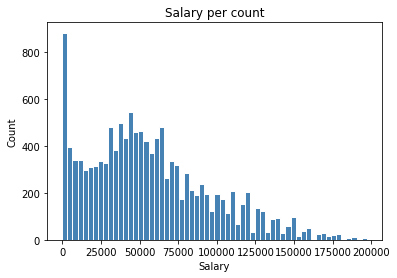

In [9]:
plt.hist(data=df,x= 'Salary',color='steelblue',bins=60,edgecolor='w')
plt.title('Salary per count') 
plt.xlabel('Salary') 
plt.ylabel('Count');

converting the record to the x axis :

In [10]:
df.Salary

2        113750.000000
14       100000.000000
17       130000.000000
18        82500.000000
22       100764.000000
             ...      
51371     74193.548387
51378    107526.881720
51382     32258.064516
51387     58000.000000
51390     40000.000000
Name: Salary, Length: 12891, dtype: float64

In [12]:
def process_log(attr):
    """
    Take attribute to make the xscale as log
    Arguments:
    attr: x that you want to take log 
    Returns:
    binedges
    
    """
    bin_edges = 10 ** np.arange(1, np.log10(attr.max())+0.1, 0.1)
    plt.xscale('log')
    tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000,300000]
    plt.xticks(tick_locs, tick_locs, rotation = 30)
    return(bin_edges)

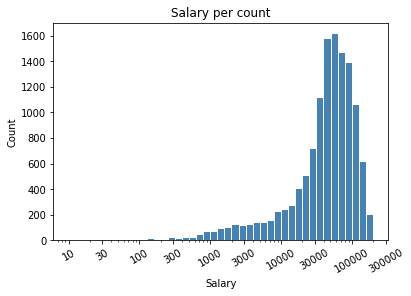

In [13]:
bin_edges = process_log(df.Salary)

plt.hist(df.Salary, bins = bin_edges,color='steelblue',edgecolor='w')
plt.title('Salary per count')
plt.xlabel('Salary')
plt.ylabel('Count');

We find that through the drawing above, most people earn roughly from 30 thousand to 100 thousand.



* # Which location pays the maximum salary for professional developers?

In [14]:
# select the needed columns only
df1 = df[['Respondent','Professional','Country','Salary']]

# We are making sure that people who are professional developer
df1 = df1[(df1.Professional == 'Professional developer')]

df1.head(10)

,Respondent,Professional,Country,Salary
2,3,Professional developer,United Kingdom,113750.000000
14,15,Professional developer,United Kingdom,100000.000000
17,18,Professional developer,United States,130000.000000
18,19,Professional developer,United States,82500.000000
22,23,Professional developer,Israel,100764.000000
25,26,Professional developer,United States,175000.000000
34,35,Professional developer,Croatia,14838.709677
36,37,Professional developer,Argentina,28200.000000
37,38,Professional developer,Germany,118279.569892
52,53,Professional developer,Brazil,15674.203822


In [15]:
# Dividing into four regions
Europe = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland']

North_America = ['United States', 'Canada']


Asia = ['China','Iran','Turkey','Lebanon','Jordan','Iraq','Singapore','South Korea','Thailand','India',
        'Vietnam','Taiwan','Russia','Japan','Malaysia','Georgia','Saudi Arabia','Oman','Qatar','Kuwait','Bahrain','United Arab Emirates']

Africa = ['Egypt','Sudan','Kenya','Morocco','Ghana','Libya','Algeria','Chad','Cameroon','Senegal','South Africa','Tunisia']


we shall create our Location variable :

In [16]:
# Classifying and storing countries into Europe, Asia, North America, Africa and others respectively
df1['Location'] = df1['Country'].apply(lambda x: 'Europe' if x in Europe 
                                               else ('North_America' if x in North_America
                                               else 'Africa' if x in Africa
                                               else 'Asia' if x in Asia 
                                               else 'Other'))

In [17]:
df1.head(10)

,Respondent,Professional,Country,Salary,Location
2,3,Professional developer,United Kingdom,113750.000000,Europe
14,15,Professional developer,United Kingdom,100000.000000,Europe
17,18,Professional developer,United States,130000.000000,North_America
18,19,Professional developer,United States,82500.000000,North_America
22,23,Professional developer,Israel,100764.000000,Other
25,26,Professional developer,United States,175000.000000,North_America
34,35,Professional developer,Croatia,14838.709677,Other
36,37,Professional developer,Argentina,28200.000000,Other
37,38,Professional developer,Germany,118279.569892,Europe
52,53,Professional developer,Brazil,15674.203822,Other


Now, as a person looking for a new place to work, salary is one of the main concerns, so lets investigate which of the 4 continents has a higher salary for professional developers 

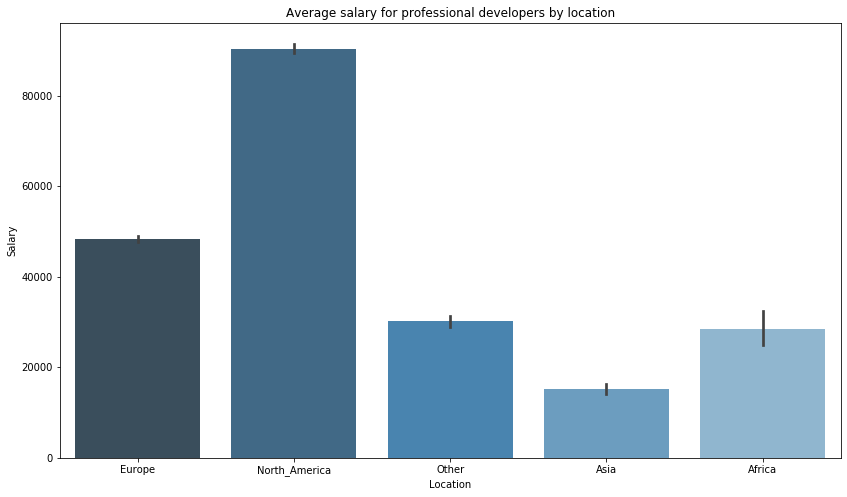

In [18]:
plt.figure(figsize=(14,8))

sns.barplot(x = 'Location' , y = 'Salary', data=df1 ,palette="Blues_d")
plt.title('Average salary for professional developers by location');

We can easily see that North America has a much higher salary than others, followed by Europe, and it seems that salaries in Asia are low when we put them next to salaries in North America and even with all, and this is an overview of salaries, there is no doubt the effect of other factors.

* # Comparison between the salary in the GCC countries (Arab Gulf countries) with the rest of the other locations

We saw what is the location that pays higher salaries to developers, now we would like to focus on the Arab Gulf countries, how is the salary situation there and how it looks compared to other locations.

To the previous four regions, we add a new region (ArabGulf), and we delete the Arab Gulf countries from the Asia region:

In [19]:
Asia = ['China','Iran','Turkey','Lebanon','Jordan','Iraq','Singapore','South Korea','Thailand','India',
        'Vietnam','Taiwan','Russia','Japan','Malaysia','Georgia']
#Asia=['Japan','China','South Korea','Malaysia']    

ArabGulf = ['Saudi Arabia','Oman','Qatar','Kuwait','Bahrain','United Arab Emirates']

In [20]:
df1['Location'] = df1['Country'].apply(lambda x: 'Europe' if x in Europe 
                                               else ('North_America' if x in North_America
                                               else 'Africa' if x in Africa
                                               else 'Asia' if x in Asia 
                                               else 'ArabGulf' if x in ArabGulf
                                               else 'Other'))

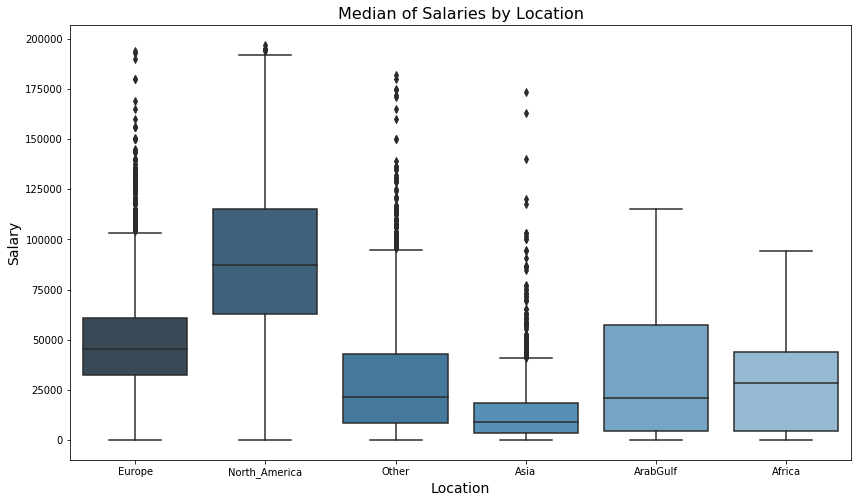

In [21]:
plt.figure(figsize=(14,8))

sns.boxplot(x = 'Location',y = 'Salary',data=df1,palette="Blues_d")

plt.title('Median of Salaries by Location', size = 16)
plt.xlabel("Location", fontsize = 14)
plt.ylabel("Salary", fontsize = 14)
plt.show();

#### From a box plot we can compare many points and obtain information:

* shows that the median salaries of North America and Europea are greater than that of the Arab gulf.
but the median salaries of the Arab gulf greater than that of Asia.

* in the plot of Arab gulf , the distribution is positively skewed which means that the mean is larger than the median = 25000,
so we can say the mean of salary in arab gulf is good and  between 30k and 100k.


In [22]:
#Let's see more clearly for the mean value
df1.groupby(['Location'])['Salary'].mean()

Location
Africa           28486.603710
ArabGulf         34327.791187
Asia             14849.236341
Europe           48323.125063
North_America    90306.040645
Other            30120.845576
Name: Salary, dtype: float64

* the most in Asia take very close salaries, but there are many extreme values appearing at the top, so it seems that someone is receiving more than 175,000 in Asia .

* In the Gulf countries, most do not seem to be taking close salaries, as there is a dispersion of data, and no extreme values appear.

* The range in America is very large, and the maximum salaries are approximately 200,000,
Whereas the salary range in the Gulf gulf is smaller, and the maximum salaries are approximately 120,000.

### Conclusions
We have studied the data of the 2017 stack overflow survey, we asked 3 important questions and analyzed them. This is what we have concluded for each question
* #### What’s the overall salary look like?

Most developers earn between 30,000 and 100,000 in salary.

* #### Which location pays the maximum salary for professional developers?

We discovered that North America has the highest salary.

* #### comparison between the salary in the GCC countries (Arab Gulf countries) with the rest of the other locations.

the salary in the Arab Gulf countries looks perfect, where developers take an average salary of 35.000, including the general salary period for developers that we discovered previously, the maximum salary is around 120,000.

> Done by Sara alkodair , 
Udacity Data Scientist Nanodegree Project.